In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\AHMED\Documents\python\healthcare-dataset-stroke-data (1).csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
for i in range(0, df.shape[1]):
    print(df[df.columns[i]].value_counts())

id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64
hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Length: 3979

In [8]:
df = df.loc[~(df.gender == 'Other')]
df.shape

(5109, 12)

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender']).astype(int)
df['ever_married'] = label_encoder.fit_transform(df['ever_married']).astype(int)
df['work_type'] = label_encoder.fit_transform(df['work_type']).astype(int)
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type']).astype(int)
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status']).astype(int)

In [10]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [11]:
mean_value = df['bmi'].mean()
df.loc[df.isna().any(axis = 1), 'bmi'] = mean_value
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
print(df.shape) # Dataframe Shape BEFORE Removing Duplicates
df.drop_duplicates()
print(df.shape) # Dataframe Shape AFTER Removing Duplicates

(5109, 12)
(5109, 12)


In [13]:
def zscore(df, target, zs, outlier_column):
    threshold = 3
    MEAN = df[target].mean()
    STD = df[target].std()
    df[zs] = (df[target] - MEAN) / STD
    df[outlier_column] = abs(df[zs]) > 3
    return df

In [14]:
def boxplot(df, target):
    Q1 = df[target].quantile(0.25)
    Q3 = df[target].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[target] >= lower_bound) & (df[target] <= upper_bound)]
    return filtered_df

In [15]:
pd.options.display.float_format = '{:.3f}'.format
# Dataframe Restore Point
df = df.loc[:, 'id':'stroke']

In [16]:
print(df.shape)
boxplot_df = boxplot(df, 'bmi')
print(boxplot_df.shape)
# Number of Outliers Found
print(df.shape[0] - boxplot_df.shape[0])

(5109, 12)
(4983, 12)
126


In [17]:
z_df = df
zscore(z_df, 'bmi', 'Z-Score(BMI)', 'Is Outlier(BMI)')
zscore(z_df, 'avg_glucose_level', 'Z-Score(AVG)', 'Is Outlier(AVG)')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Z-Score(BMI),Is Outlier(BMI),Z-Score(AVG),Is Outlier(AVG)
0,9046,1,67.000,0,1,1,2,1,228.690,36.600,1,1,1.001,False,2.706,False
1,51676,0,61.000,0,0,1,3,0,202.210,28.895,2,1,0.000,False,2.121,False
2,31112,1,80.000,0,1,1,2,0,105.920,32.500,2,1,0.468,False,-0.005,False
3,60182,0,49.000,0,0,1,2,1,171.230,34.400,3,1,0.715,False,1.437,False
4,1665,0,79.000,1,0,1,3,0,174.120,24.000,2,1,-0.636,False,1.501,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.000,1,0,1,2,1,83.750,28.895,2,0,0.000,False,-0.494,False
5106,44873,0,81.000,0,0,1,3,1,125.200,40.000,2,0,1.443,False,0.421,False
5107,19723,0,35.000,0,0,1,3,0,82.990,30.600,2,0,0.222,False,-0.511,False
5108,37544,1,51.000,0,0,1,2,0,166.290,25.600,1,0,-0.428,False,1.328,False


In [18]:
# Number of Outliers Found
z_df.loc[(z_df['Is Outlier(BMI)'] == True) | (z_df['Is Outlier(AVG)'] == True)].shape

(108, 16)

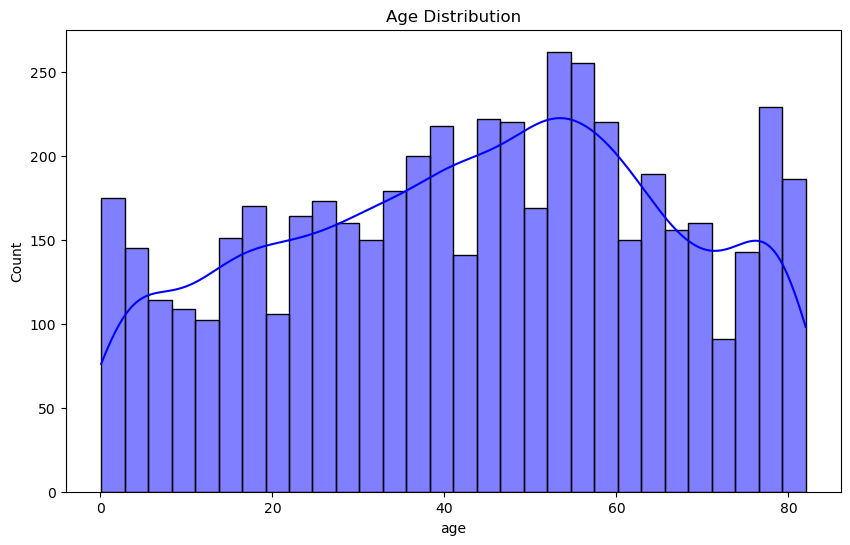

In [19]:
# Visualization: Histogram
# Age Distribution
# Seaborn
plt.figure(figsize = (10, 6))
sns.histplot(df['age'], bins = 30, kde = True, color = 'blue')
plt.title('Age Distribution')
plt.show()

In [20]:
correlation_matrix = df.loc[:, ['age', 'bmi', 'avg_glucose_level']]
correlation_matrix = correlation_matrix.corr()

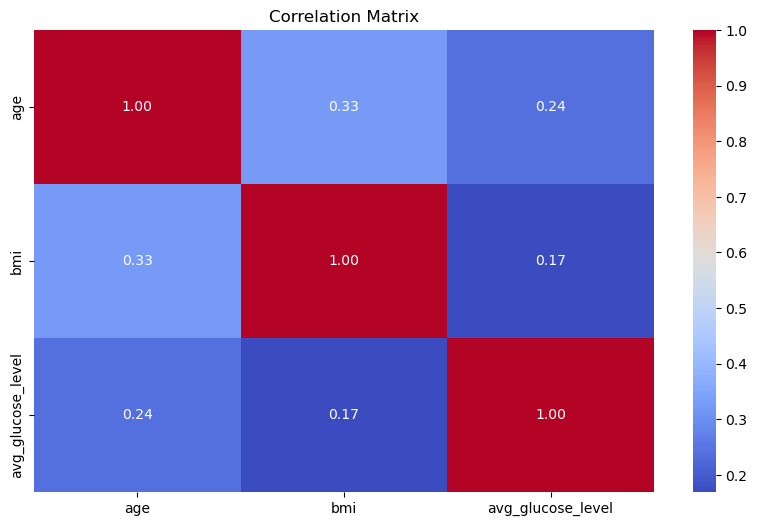

In [21]:
# Visualization: Correlation Matrix
# Seaborn
plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
x = df.loc[(df['Is Outlier(BMI)'] == False) & (df['Is Outlier(AVG)'] == False), "gender":"smoking_status"]

In [24]:
y = df.loc[(df['Is Outlier(BMI)'] == False) & (df['Is Outlier(AVG)'] == False), "stroke"]

In [25]:
tmp = y.value_counts() # Before SMOTE OverSampling
tmp

stroke
0    4762
1     239
Name: count, dtype: int64

In [26]:
smote = SMOTE(sampling_strategy = 'minority')
x, y = smote.fit_resample(x, y)

In [27]:
y.value_counts() # After SMOTE OverSampling

stroke
1    4762
0    4762
Name: count, dtype: int64

In [28]:
x = x.values
y = y.values

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [32]:
classifier = LogisticRegression(random_state = 0)

In [33]:
classifier.fit(x_train, y_train)

C:\Users\AHMED\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [34]:
y_pred = classifier.predict(x_test)

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[905, 268],
       [213, 995]], dtype=int64)

In [36]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1173
           1       0.79      0.82      0.81      1208

    accuracy                           0.80      2381
   macro avg       0.80      0.80      0.80      2381
weighted avg       0.80      0.80      0.80      2381



In [37]:
# Random Forest Classification
X = df.loc[(df['Is Outlier(BMI)'] == False) & (df['Is Outlier(AVG)'] == False), "gender":"smoking_status"]
Y = df.loc[(df['Is Outlier(BMI)'] == False) & (df['Is Outlier(AVG)'] == False), "stroke"]

smote = SMOTE(sampling_strategy = 'minority')
X, Y = smote.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 7950)

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(random_state = 0)

In [40]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [41]:
y_predict = rfc.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
print('Model Accuracy Score with 10 Weak Learners: {0:0.4f}'. format(accuracy_score(Y_test, y_predict)))

Model Accuracy Score with 10 Weak Learners: 0.9420


In [44]:
feature_scores = pd.Series(rfc.feature_importances_, index = X_train.columns)
feature_scores

gender              0.030
age                 0.423
hypertension        0.019
heart_disease       0.011
ever_married        0.021
work_type           0.072
Residence_type      0.029
avg_glucose_level   0.183
bmi                 0.156
smoking_status      0.057
dtype: float64

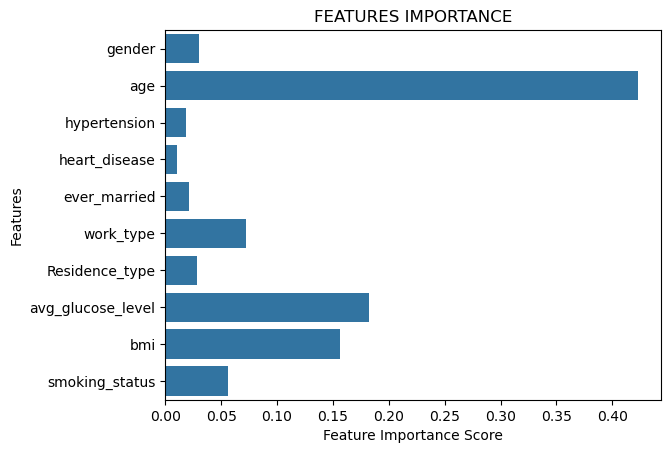

In [45]:
sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('FEATURES IMPORTANCE')
plt.show()

In [46]:
cm2 = confusion_matrix(Y_test, y_predict)
cm2

array([[1101,   79],
       [  59, 1142]], dtype=int64)

In [47]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1180
           1       0.94      0.95      0.94      1201

    accuracy                           0.94      2381
   macro avg       0.94      0.94      0.94      2381
weighted avg       0.94      0.94      0.94      2381

